# Pinterest Project

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

read *.csv files:

In [2]:
column_names = ['pintree_id', 'tree_nodes', 'tree_max_width', 'tree_max_depth', 'virality', 'category', 'source']
pin_tree_properties = pd.read_csv("share/pin-tree-properties.csv", header=None, names = column_names)

column_names = ['meta_number', 'pin_id', 'user_id', 'category', 'source', 'num_of_likes', 'birth_date'] 
pin = pd.read_csv("share/pin.csv", header=None, names = column_names)

column_names = ['pinner_id', 'num_of_pins', 'num_of_followers', 'num_of_followings', 'num_of_likes', 'gender', 
                'location', 'num_of_categories', 'num_of_boards']
pinner = pd.read_csv("share/pinner.csv", header=None, names = column_names)

column_names = ['pintree_id', 'pinner_id']
pintree_pinner = pd.read_csv("share/pintree_pinner.csv", header=None, names = column_names)

column_names = ['pintree_id', 'meta_number', 'sender_pin_id', 'received_pin_id']
pintree = pd.read_csv("share/pintree.csv", header=None, names = column_names)

column_names = ['user_id', 'num_of_pins', 'num_of_followers', 'num_of_followings', 'num_of_likes', 'gender', 
                'location', 'country', 'num_of_followers_twitter', 'num_of_followings_twitter', 'num_of_tweets']
user = pd.read_csv("share/user.csv", header=None, names = column_names)

Print all rows and columns. Dont hide any:

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#Display the first five rows to get a feel of the data
print("*****pin_tree_properties*****")
print(pin_tree_properties.head())
print("*****pin*****")
print(pin.head())
print("*****pinner*****")
print(pinner.head())
print("*****pintree_pinner*****")
print(pintree_pinner.head())
print("*****pintree*****")
print(pintree.head())
print("*****user*****")
print(user.head())

*****pin_tree_properties*****
   pintree_id  tree_nodes  tree_max_width  tree_max_depth  virality category  \
0           1           1               1               1  0.000000  animals   
1           2           2               1               2  1.000000  animals   
2           3           4               3               2  1.500000  animals   
3           4           1               1               1  0.000000  animals   
4           5           3               2               2  1.333333  animals   

               source  
0    www.mirror.co.uk  
1    www.mirror.co.uk  
2    www.mirror.co.uk  
3  www.dailypuppy.com  
4       www.care2.com  
*****pin*****
   meta_number  pin_id  user_id category              source  num_of_likes  \
0            0       3   409600  animals    www.mirror.co.uk             0   
1            0       5   409600  animals    www.mirror.co.uk             0   
2            0       6   409600  animals    www.mirror.co.uk             1   
3            0     

Next, we need to find active followers and check the ratio of active followers over true followers.
To get this quantity (taking user id 88888 for example):
1. First get all (meta number, pin id) pairs with user id 88888 from the pin.csv file.
2. For each (meta number, pin id), treat it as (meta number, sender pin id) in the pintree.csv and get the corresponding (meta number, received pin id).
3. After having all (meta number, receieved pin id) pairs, go to the pin.csv file again and retrieve all corresponding user ids and treat them as the active followers for user id 88888.

In [5]:
user_IDs = []
active_followers = []
true_followers =[]
ratios = []
# true_follower_0 records how many users have no true followers or simply 0 true followers
true_follower_0 = 0
counter = 1
for index, row in user.iterrows():
    if(counter % 20000 == 0):
        print(counter)
    counter += 1
    user_ID = row['user_id']
    true_follower = row['num_of_followers']
    if(pd.isnull(true_follower) or true_follower==0):
        true_follower_0 += 1
        continue
    user_IDs.append(user_ID)
    true_followers.append(true_follower)
    sending_id = pin.loc[pin.user_id==user_ID, ['user_id', 'meta_number', 'pin_id']]
    receiving_id = pd.DataFrame()
    for index2, row2 in sending_id.iterrows():
        pin_ID = pintree.loc[(pintree.meta_number==row2.meta_number) & (pintree.sender_pin_id==row2.pin_id), 
                             ['meta_number', 'sender_pin_id', 'received_pin_id']]
        receiving_id = receiving_id.append(pin_ID)
    active_follower = pd.DataFrame()
    for index3, row3 in receiving_id.iterrows():
        pin_ID = pin.loc[(pin.meta_number==row3.meta_number) & (pin.pin_id==row3.received_pin_id), ['user_id']]
        active_follower = active_follower.append(pin_ID)
    if(active_follower.size==0):
        active_followers.append(0)
    else:
        active_follower = active_follower['user_id'].unique()
        active_followers.append(active_follower.size)
    ratio = active_follower.size / (true_follower*1.00)
    ratios.append(ratio)

20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000
780000
800000
820000
840000
860000
880000
900000
920000
940000
960000
980000
1000000
1020000


In [32]:
dic_output = {}
dic_output['user_ID'] = user_IDs
dic_output['active_followers'] = active_followers
dic_output['true_followers'] = true_followers
dic_output['ratios'] = ratios
active_followers = pd.DataFrame(dic_output, columns=['user_ID', 'active_followers', 'true_followers', 'ratios'])
active_followers.to_csv('share/active_followers.csv', index = False)

print('Nan or Zero true followers: {}'.format(true_follower_0))
print(active_followers.describe())
print(active_followers.dtypes)

Nan or Zero true followers: 17357
            user_ID  active_followers  true_followers        ratios
count  1.016761e+06      1.016761e+06    1.016761e+06  1.016761e+06
mean   1.501063e+06      1.124826e+00    5.833925e+02  1.981153e-02
std    8.702381e+05      6.739713e+00    3.103987e+04  2.262990e-01
min    9.000000e+00      0.000000e+00    1.000000e+00  0.000000e+00
25%    7.486790e+05      0.000000e+00    2.900000e+01  0.000000e+00
50%    1.502950e+06      0.000000e+00    7.800000e+01  0.000000e+00
75%    2.249221e+06      0.000000e+00    1.770000e+02  0.000000e+00
max    3.022167e+06      2.042000e+03    8.430910e+06  5.200000e+01
user_ID               int64
active_followers      int64
true_followers      float64
ratios              float64
dtype: object


Note: it is possible that a user can repin from his/her non-followers. For example, he/she can search the category menu, and if he/she finds a nice pin, he/she can fetch it.  After that he/she can request to be the follower of the one who owns the nice pin. Thus, it’s possible that some users' active followers are larger than their true follower

In [33]:
#if we want to load active_followers directly, then remove '#'
#active_followers = pd.read_csv("share/active_followers.csv")
one_and_ten = active_followers.loc[(active_followers.active_followers>0) & 
                                   (active_followers.active_followers<=10), ['active_followers']]

ten_and_twenty = active_followers.loc[(active_followers.active_followers>10) & 
                                      (active_followers.active_followers<=20), ['active_followers']]

twenty_and_thirty = active_followers.loc[(active_followers.active_followers>20) & 
                                         (active_followers.active_followers<=30), ['active_followers']]

thirty_and_fourty = active_followers.loc[(active_followers.active_followers>30) & 
                                         (active_followers.active_followers<=40), ['active_followers']]
over_fourty = active_followers.loc[active_followers.active_followers>40, ['active_followers']]
print("********active followers between 1 and 10********")
print(one_and_ten.describe())
print("********active followers between 11 and 20********")
print(ten_and_twenty.describe())
print("********active followers between 21 and 30********")
print(twenty_and_thirty.describe())
print("********active followers between 31 and 40********")
print(thirty_and_fourty.describe())
print("********active followers over 40********")
print(over_fourty.describe())

********active followers between 1 and 10********
       active_followers
count     206457.000000
mean           2.803412
std            2.524068
min            1.000000
25%            1.000000
50%            2.000000
75%            4.000000
max           10.000000
********active followers between 11 and 20********
       active_followers
count      13922.000000
mean          14.055883
std            2.773189
min           11.000000
25%           12.000000
50%           13.000000
75%           16.000000
max           20.000000
********active followers between 21 and 30********
       active_followers
count       3422.000000
mean          24.694039
std            2.821736
min           21.000000
25%           22.000000
50%           24.000000
75%           27.000000
max           30.000000
********active followers between 31 and 40********
       active_followers
count       1495.000000
mean          35.014716
std            2.905435
min           31.000000
25%           32.000000
50%  

In [108]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [109]:
df_user = pd.read_csv('share/user.csv', names=['user_ID', 'num_pins', 'num_followers', 'num_followings', 
                                               'num_likes', 'gender', 'locale', 'country', 'num_followers_twitter',
                                               'num_followings_twitter', 'num_tweets'])
# we only care about users with nonzero active followers !!!
active_followers = pd.read_csv("share/active_followers.csv")
active_followers = active_followers.loc[active_followers.active_followers>0, :]
active_followers = active_followers.drop('true_followers', axis = 1)
df_user = pd.merge(active_followers, df_user, how='left', on='user_ID')

# dropout user_id first. Will pick it up later
user_id = df_user['user_ID']
df_user = df_user.drop('user_ID', axis=1)

In [110]:
df_user.describe()

,active_followers,ratios,num_pins,num_followers,num_followings,num_likes,num_followers_twitter,num_followings_twitter,num_tweets
count,228114.000000,2.281140e+05,228114.000000,2.281140e+05,228114.000000,228114.000000,2.324000e+04,23240.000000,23240.000000
mean,5.013629,8.830495e-02,3994.298631,1.743671e+03,275.442244,541.922469,3.952370e+03,911.853744,4572.015361
std,13.526584,4.713956e-01,6993.116170,5.946617e+04,1063.347452,2429.224677,7.921981e+04,7111.853042,12321.149067
min,1.000000,2.484254e-07,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,5.586592e-03,822.000000,6.500000e+01,55.000000,11.000000,NaN,NaN,NaN
50%,2.000000,1.428571e-02,1938.000000,1.480000e+02,106.000000,58.000000,NaN,NaN,NaN
75%,5.000000,4.672897e-02,4310.000000,3.270000e+02,212.000000,278.000000,NaN,NaN,NaN
max,2042.000000,5.200000e+01,100210.000000,8.430910e+06,63103.000000,111481.000000,6.493055e+06,816271.000000,524496.000000


It seems NaN values are present in all input columns but for two (technical_22 and technical_34).
So let us count the number of missing values in each of the columns.

In [111]:
labels = []
values = []
print('The number of missing values in each of the columns:')
for col in df_user.columns:
    labels.append(col)
    values.append(df_user[col].isnull().sum())
    print(col, values[-1], 'Nan ratio: {:f}'.format(values[-1]/(1.00*df_user.shape[0])))

The number of missing values in each of the columns:
('active_followers', 0, 'Nan ratio: 0.000000')
('ratios', 0, 'Nan ratio: 0.000000')
('num_pins', 0, 'Nan ratio: 0.000000')
('num_followers', 0, 'Nan ratio: 0.000000')
('num_followings', 0, 'Nan ratio: 0.000000')
('num_likes', 0, 'Nan ratio: 0.000000')
('gender', 163209, 'Nan ratio: 0.715471')
('locale', 163209, 'Nan ratio: 0.715471')
('country', 163209, 'Nan ratio: 0.715471')
('num_followers_twitter', 204874, 'Nan ratio: 0.898121')
('num_followings_twitter', 204874, 'Nan ratio: 0.898121')
('num_tweets', 204874, 'Nan ratio: 0.898121')


Thus, we can see 'gender', 'locale', 'country', 'num_followers_twitter', 'num_followings_twitter' and 'num_tweets' have a lot missing values !  

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

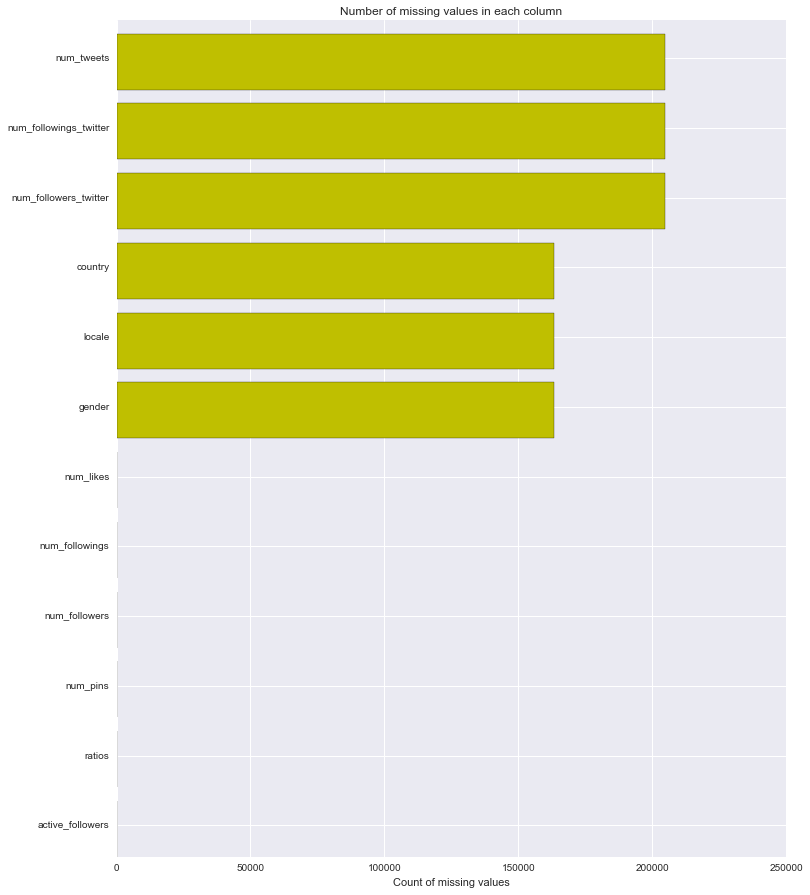

In [113]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,15))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

Now let us look at the distribution plot of some of the numeric variables.

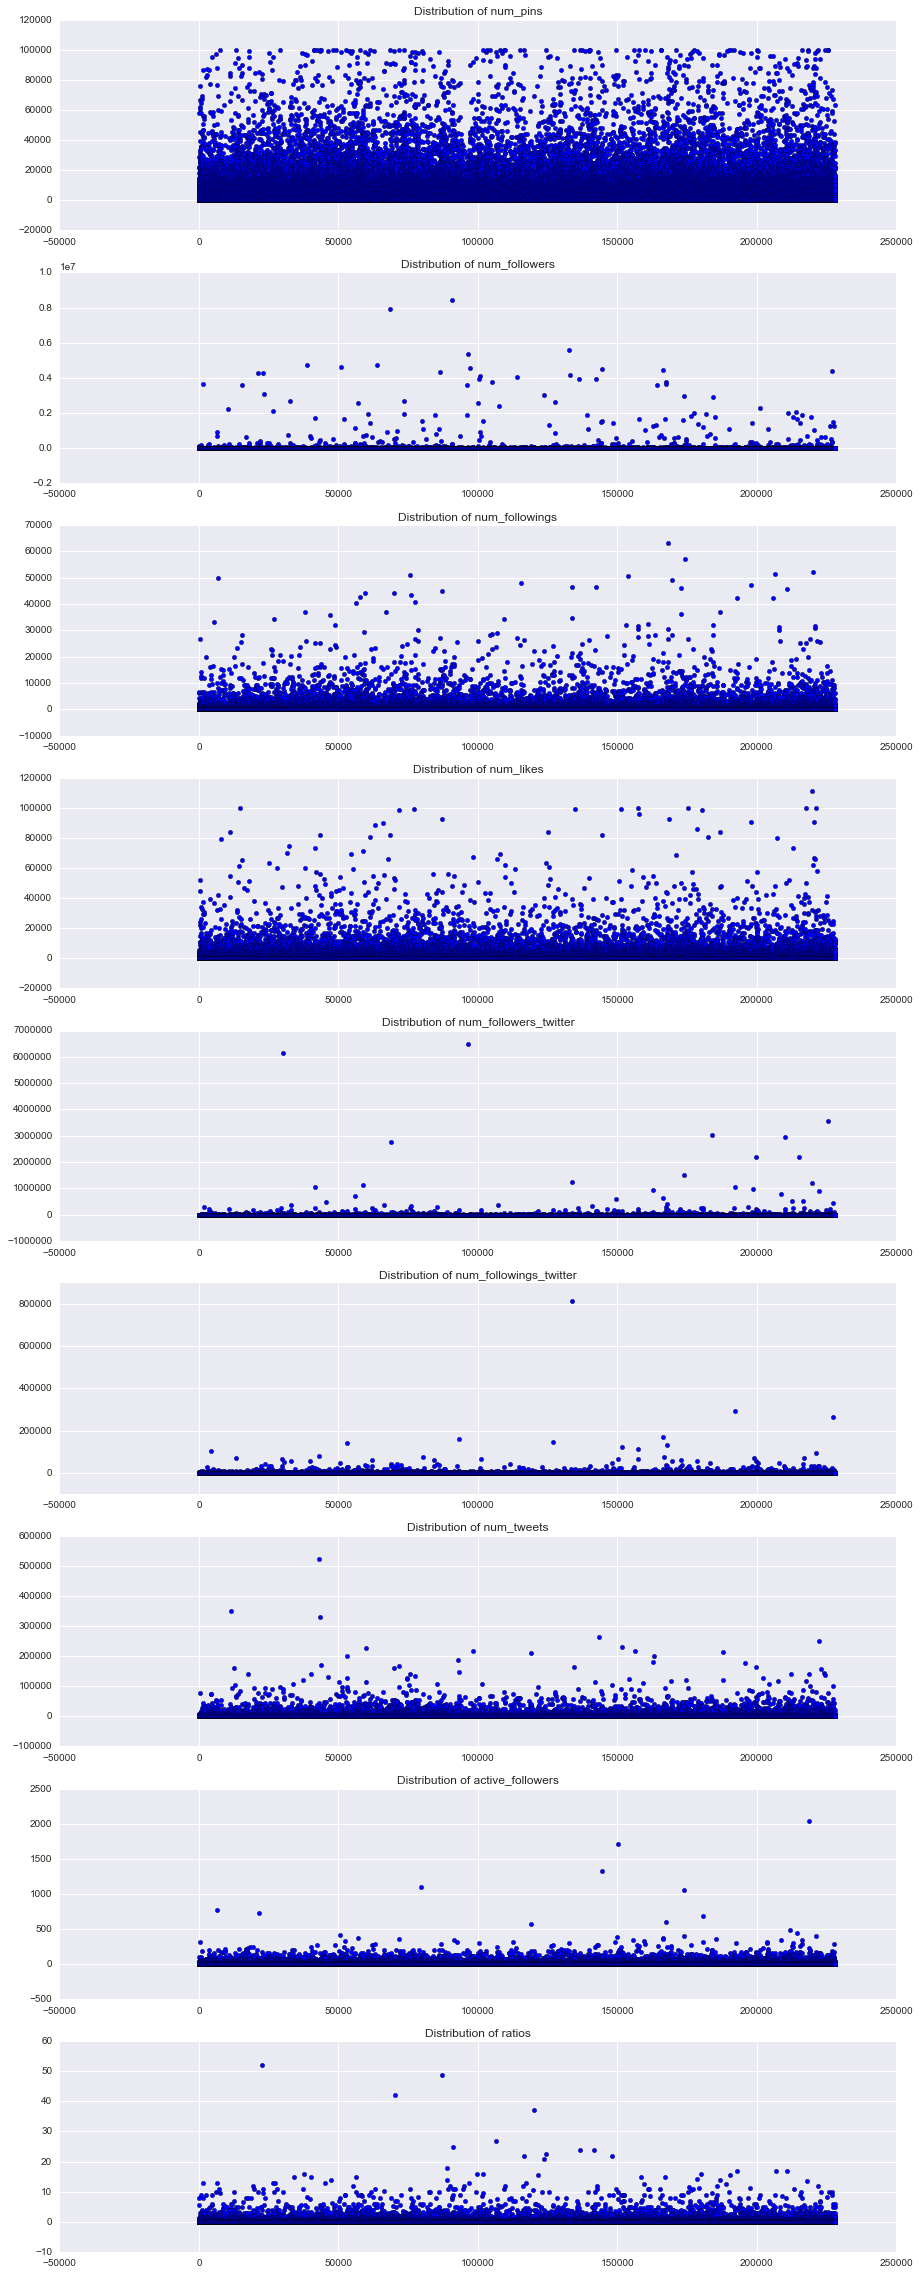

In [114]:
cols_to_use = ['num_pins', 'num_followers', 'num_followings', 'num_likes', 'num_followers_twitter',
               'num_followings_twitter', 'num_tweets', 'active_followers', 'ratios']
fig = plt.figure(figsize=(15, 40))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(9, 1, plot_count)
    plt.scatter(range(df_user.shape[0]), df_user[col].values)
    plt.title("Distribution of "+col)
plt.show()

num_pins min 0.000 max 100210.000 mean 3994.299 std 6993.101
num_followers min 1.000 max 8430910.000 mean 1743.671 std 59466.042
num_followings min 0.000 max 63103.000 mean 275.442 std 1063.345
num_likes min 0.000 max 111481.000 mean 541.922 std 2429.219
num_followers_twitter min 0.000 max 6493055.000 mean 3952.370 std 79218.101
num_followings_twitter min 0.000 max 816271.000 mean 911.854 std 7111.700
num_tweets min 0.000 max 524496.000 mean 4572.015 std 12320.884
active_followers min 1.000 max 2042.000 mean 5.014 std 13.527
ratios min 0.000 max 52.000 mean 0.088 std 0.471


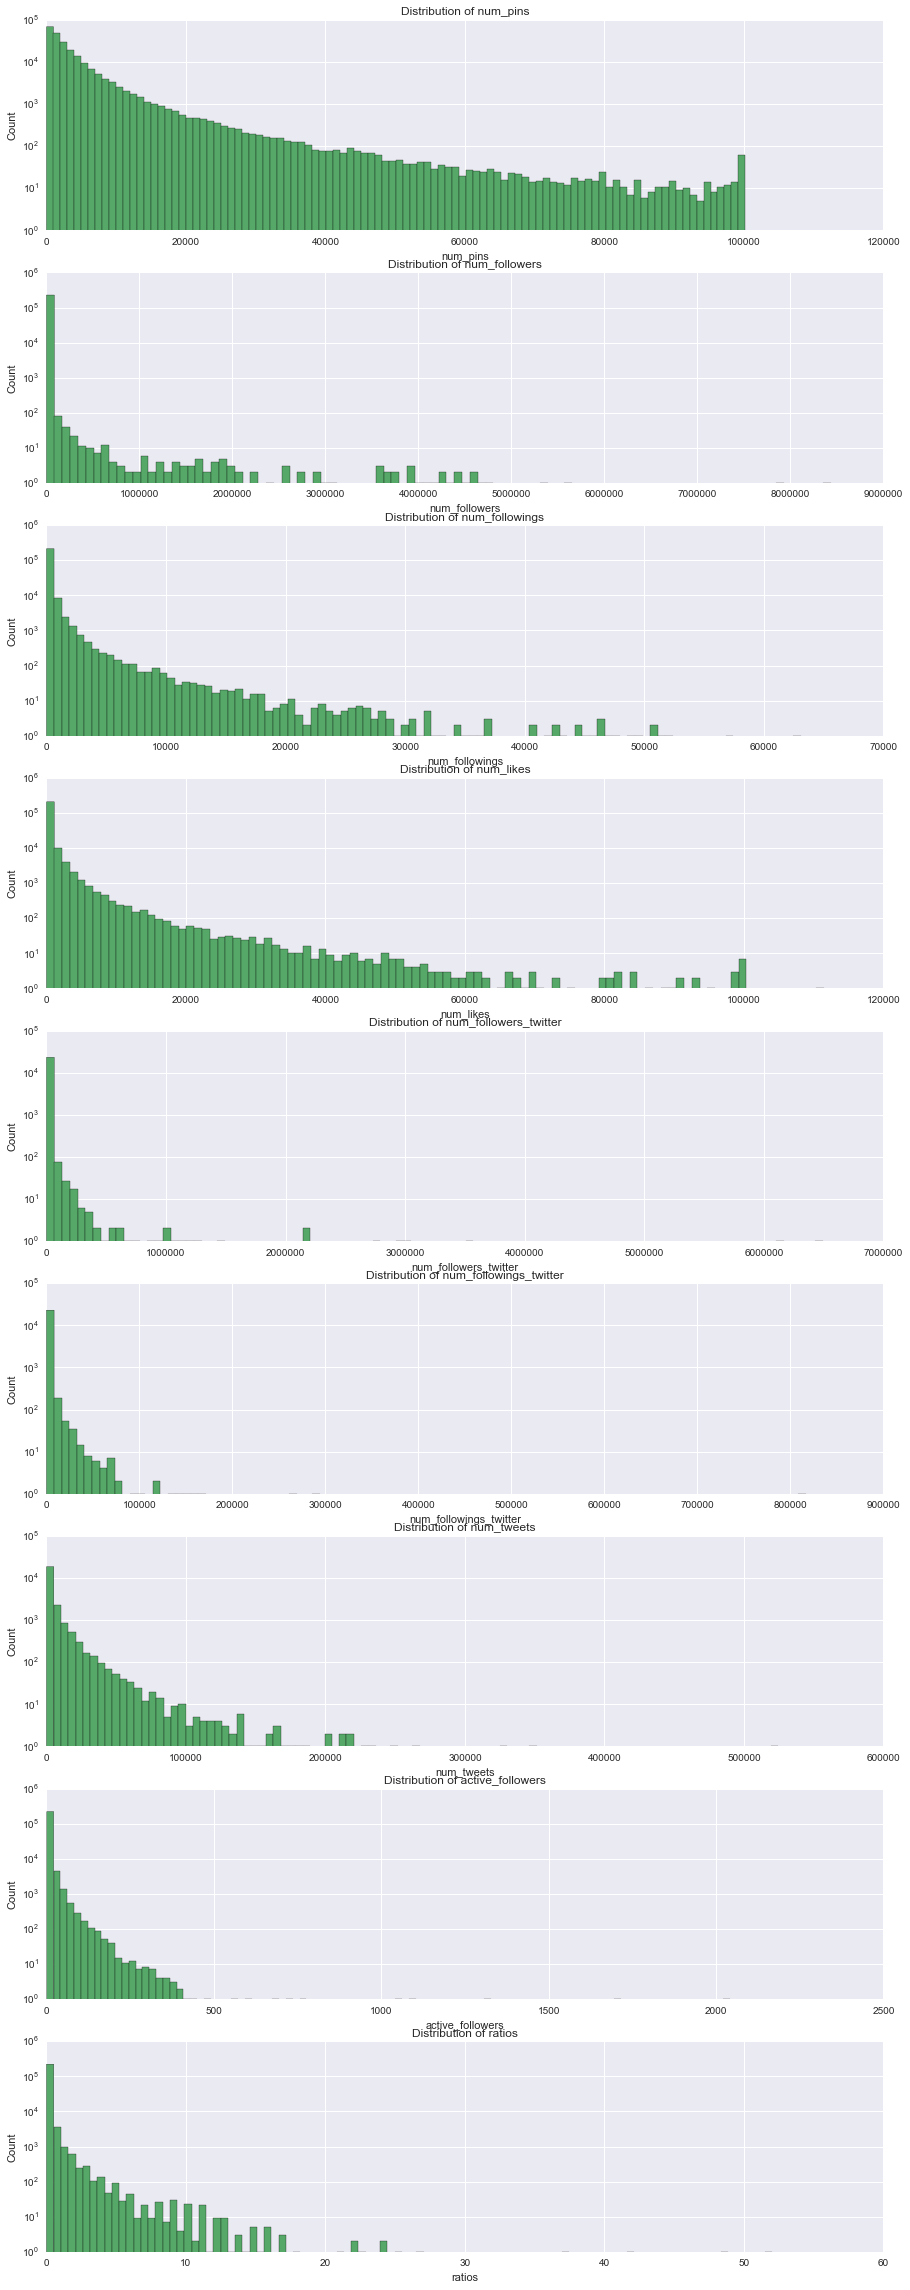

In [115]:
fig = plt.figure(figsize=(15, 40))
plot_count = 0
for col in cols_to_use:
    y = df_user.loc[df_user[col].notnull(), col].values
    plot_count += 1
    plt.subplot(9, 1, plot_count)
    plt.hist(y, bins=100, color=p[1], log=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of ' + col)
    print(col + ' min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'
          .format(np.min(y), np.max(y), np.mean(y), np.std(y)))
plt.show()

User feature (10 features) manipulation:
( num_pins, num_followers, num_followings, num_likes, gender, locale, country, num_followers_twitter, num_followings_twitter, num_tweets):
1. num_pins: normalized to [0, 1].
2. num_followers: normalized to [0, 1].
3. num_followings: normalized to [0, 1].
4. num_likes: normalized to [0, 1].
5. gender: male/female/nan, using one-hot-encoding.
6. locale: (longitude, latitude), normalized by the square root of the largest Euclidean distance between two locales. At begining, I will simply drop this feature.
7. country: (longitude, latitude) of the capital, normalized by the square root of the largest Euclidean distance between countries. At begining, I will simply drop this feature.
8. num_of followers(twitter) : normalized to [0, 1].
9. num_of followings(twitter): normalized to [0, 1].
10. num_of tweets: normalized to [0, 1].


fill non-available values simply with 0 

In [116]:
df_user['num_followers_twitter'] = df_user['num_followers_twitter'].fillna(value = 0)
df_user['num_followings_twitter'] = df_user['num_followings_twitter'].fillna(value = 0)
df_user['num_tweets'] = df_user['num_tweets'].fillna(value = 0)

In [117]:
# normalized to [0, 1]
df_user_max = df_user.max()
df_user['num_pins'] = df_user['num_pins']/(1.00*df_user_max['num_pins'])
df_user['num_followers'] = df_user['num_followers']/(1.00*df_user_max['num_followers'])
df_user['num_followings'] = df_user['num_followings']/(1.00*df_user_max['num_followings'])
df_user['num_likes'] = df_user['num_likes']/(1.00*df_user_max['num_likes'])
df_user['num_followers_twitter'] = df_user['num_followers_twitter']/(1.00*df_user_max['num_followers_twitter'])
df_user['num_followings_twitter'] = df_user['num_followings_twitter']/(1.00*df_user_max['num_followings_twitter'])
df_user['num_tweets'] = df_user['num_tweets']/(1.00*df_user_max['num_tweets'])

In [118]:
# drop locale and country
df_user = df_user.drop('locale', axis=1)
df_user = df_user.drop('country', axis=1)

In [119]:
# df_user['gender'].unique() : [nan 'female' 'male' 'female (hi' 'male (hidd']
# use one-hot-encoding to manipulate gender
df_user['gender'] = df_user['gender'].fillna(value = '0')
df_user.loc[(df_user.gender=='male')|(df_user.gender=='male (hidd'), 'gender'] = '1'
df_user.loc[(df_user.gender=='female')|(df_user.gender=='female (hi'), 'gender'] = '2'

labels = df_user['gender'].unique()
label_encoder = LabelEncoder()
label_encoder.fit(labels)
feature = label_encoder.transform(df_user['gender'])
feature = feature.reshape(len(feature), 1)
onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels))
feature = onehot_encoder.fit_transform(feature)

df_user = df_user.drop('gender', axis=1)
genders = pd.DataFrame(data = feature, columns = ['Nan_gender', 'male', 'female'])
df_user = pd.concat([df_user, genders], axis=1)

In [120]:
labels = []
values = []
print('The number of missing values in each of the columns:')
for col in df_user.columns:
    labels.append(col)
    values.append(df_user[col].isnull().sum())
    print(col, values[-1], 'Nan ratio: {:f}'.format(values[-1]/(1.00*df_user.shape[0])))

The number of missing values in each of the columns:
('active_followers', 0, 'Nan ratio: 0.000000')
('ratios', 0, 'Nan ratio: 0.000000')
('num_pins', 0, 'Nan ratio: 0.000000')
('num_followers', 0, 'Nan ratio: 0.000000')
('num_followings', 0, 'Nan ratio: 0.000000')
('num_likes', 0, 'Nan ratio: 0.000000')
('num_followers_twitter', 0, 'Nan ratio: 0.000000')
('num_followings_twitter', 0, 'Nan ratio: 0.000000')
('num_tweets', 0, 'Nan ratio: 0.000000')
('Nan_gender', 0, 'Nan ratio: 0.000000')
('male', 0, 'Nan ratio: 0.000000')
('female', 0, 'Nan ratio: 0.000000')


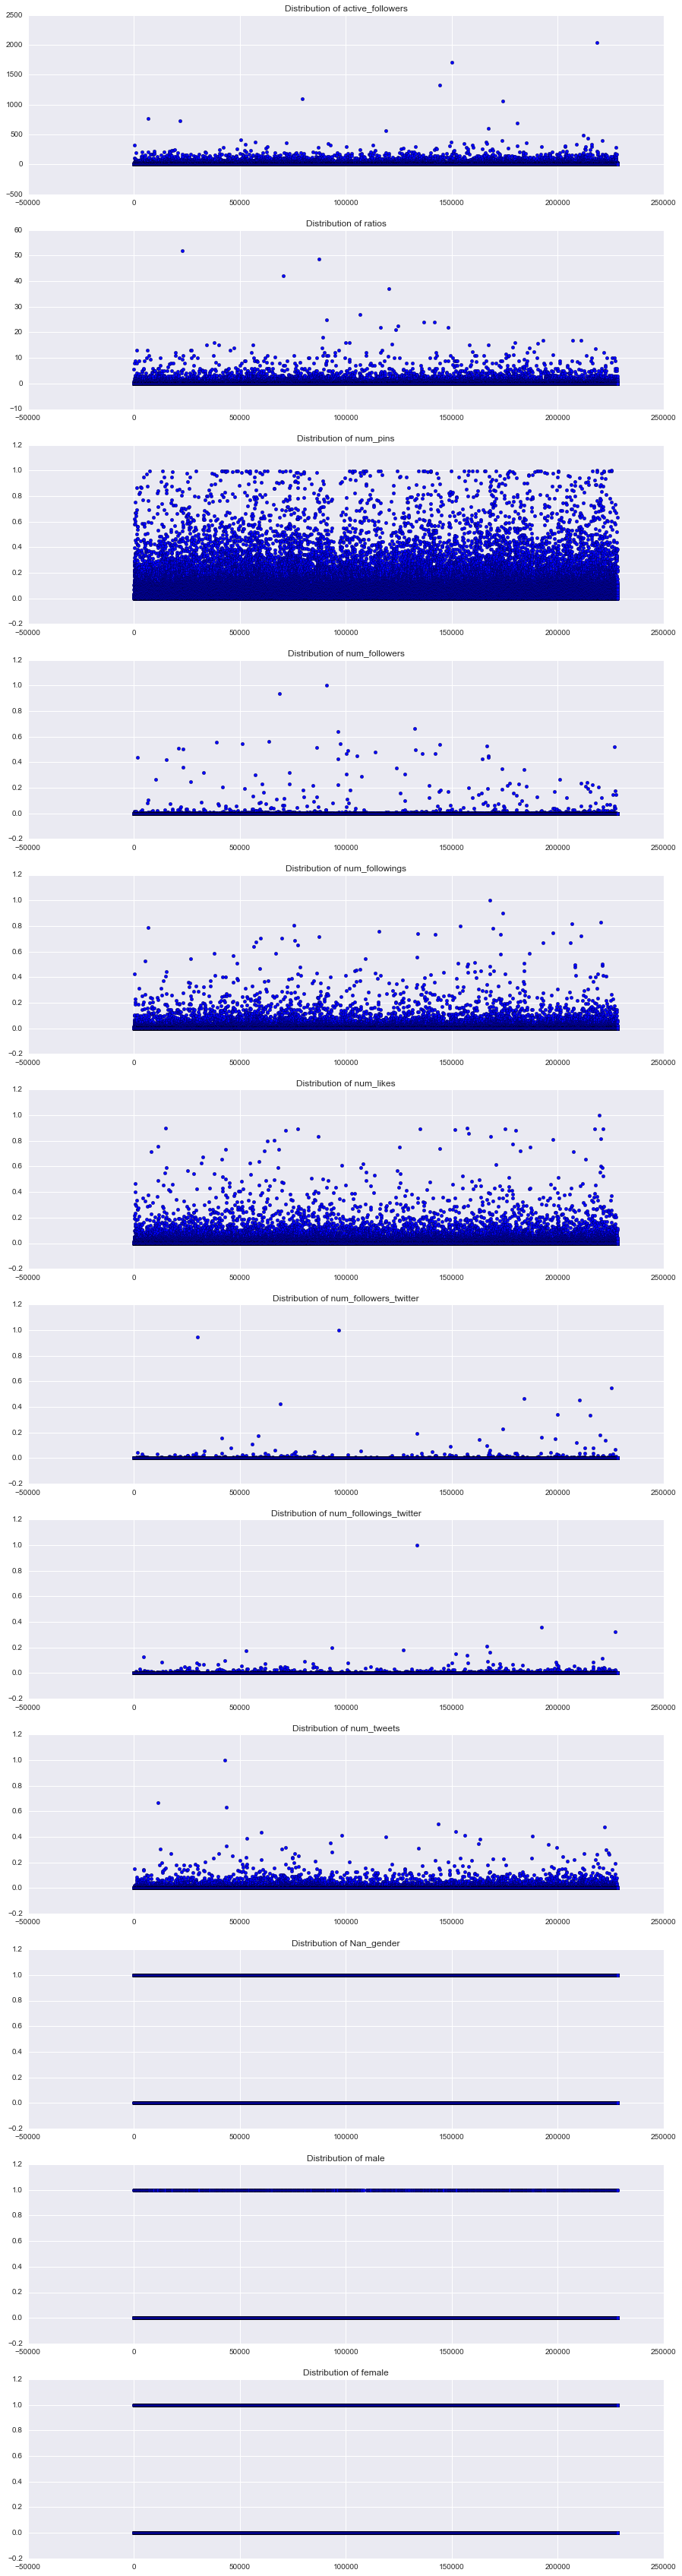

In [121]:
cols_to_use = ['active_followers', 'ratios', 'num_pins', 'num_followers', 'num_followings', 'num_likes', 
               'num_followers_twitter', 'num_followings_twitter', 'num_tweets', 'Nan_gender', 'male', 'female']
fig = plt.figure(figsize=(15, 60))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(12, 1, plot_count)
    plt.scatter(range(df_user.shape[0]), df_user[col].values)
    plt.title("Distribution of "+col)
plt.show()

active_followers min 1.000 max 2042.000 mean 5.014 std 13.527
ratios min 0.000 max 52.000 mean 0.088 std 0.471
num_pins min 0.000 max 1.000 mean 0.040 std 0.070
num_followers min 0.000 max 1.000 mean 0.000 std 0.007
num_followings min 0.000 max 1.000 mean 0.004 std 0.017
num_likes min 0.000 max 1.000 mean 0.005 std 0.022
num_followers_twitter min 0.000 max 1.000 mean 0.000 std 0.004
num_followings_twitter min 0.000 max 1.000 mean 0.000 std 0.003
num_tweets min 0.000 max 1.000 mean 0.001 std 0.008
Nan_gender min 0.000 max 1.000 mean 0.715 std 0.451
male min 0.000 max 1.000 mean 0.033 std 0.179
female min 0.000 max 1.000 mean 0.251 std 0.434


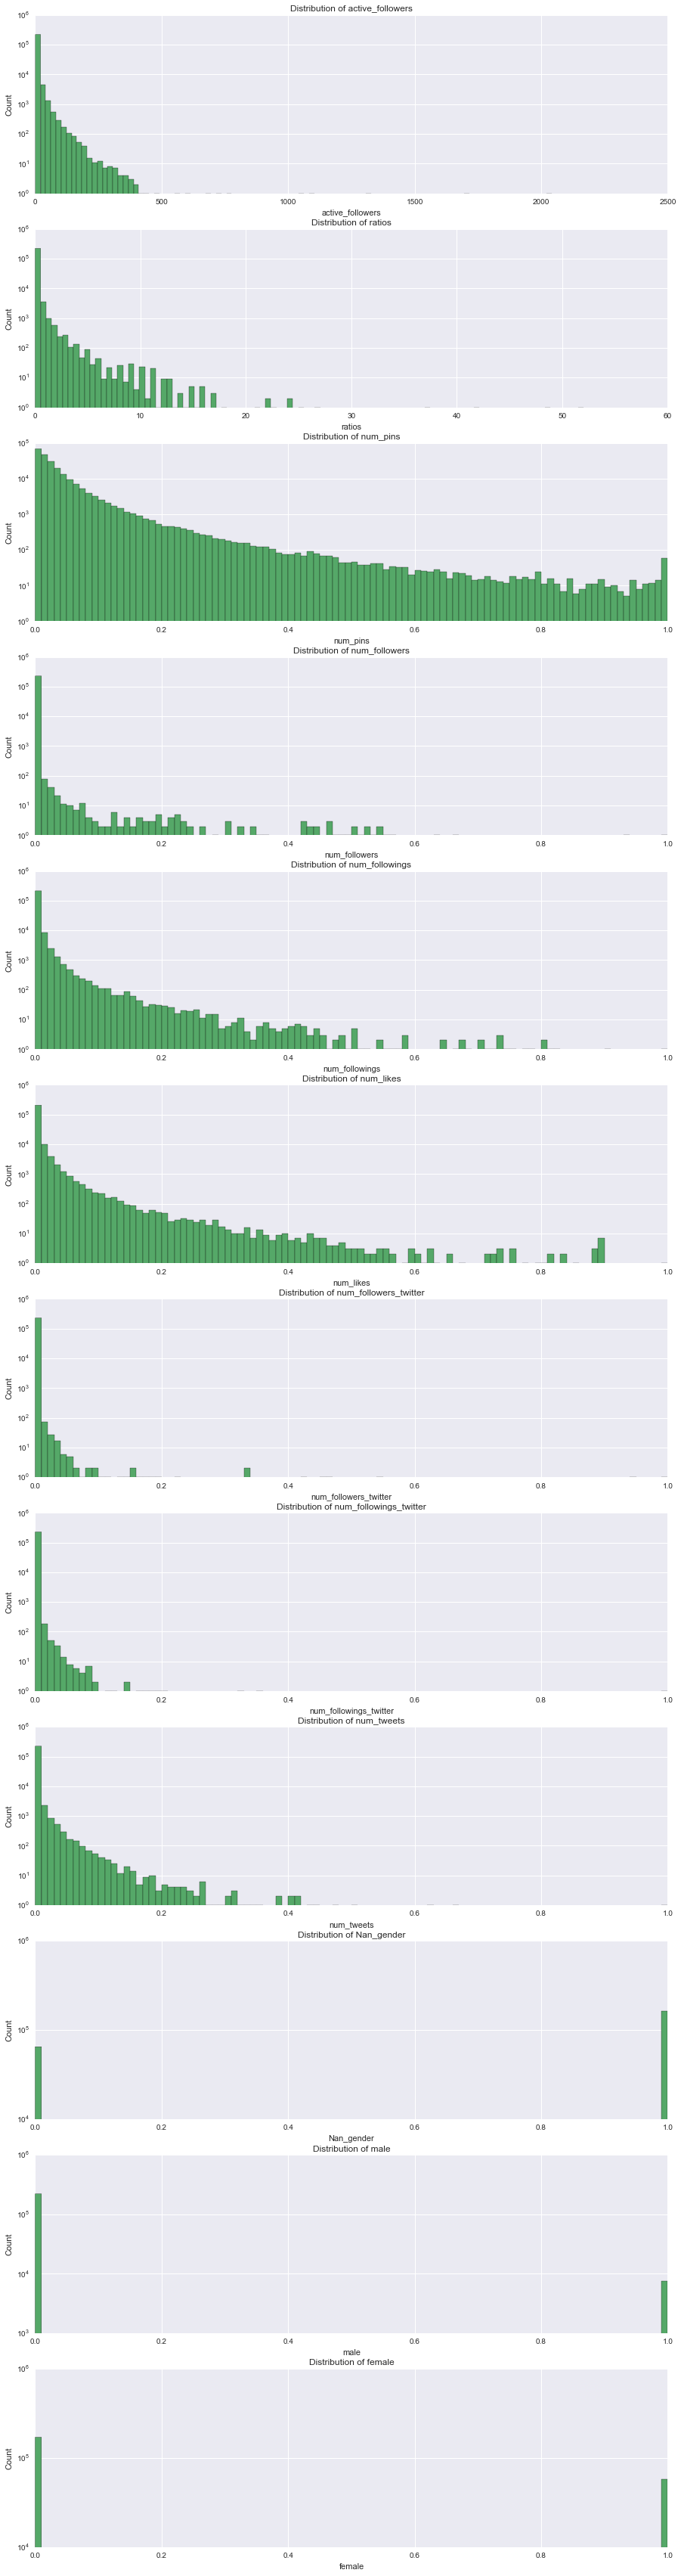

In [122]:
fig = plt.figure(figsize=(15, 60))
plot_count = 0
for col in cols_to_use:
    y = df_user.loc[df_user[col].notnull(), col].values
    plot_count += 1
    plt.subplot(12, 1, plot_count)
    plt.hist(y, bins=100, color=p[1], log=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Distribution of ' + col)
    print(col + ' min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'
          .format(np.min(y), np.max(y), np.mean(y), np.std(y)))
plt.show()

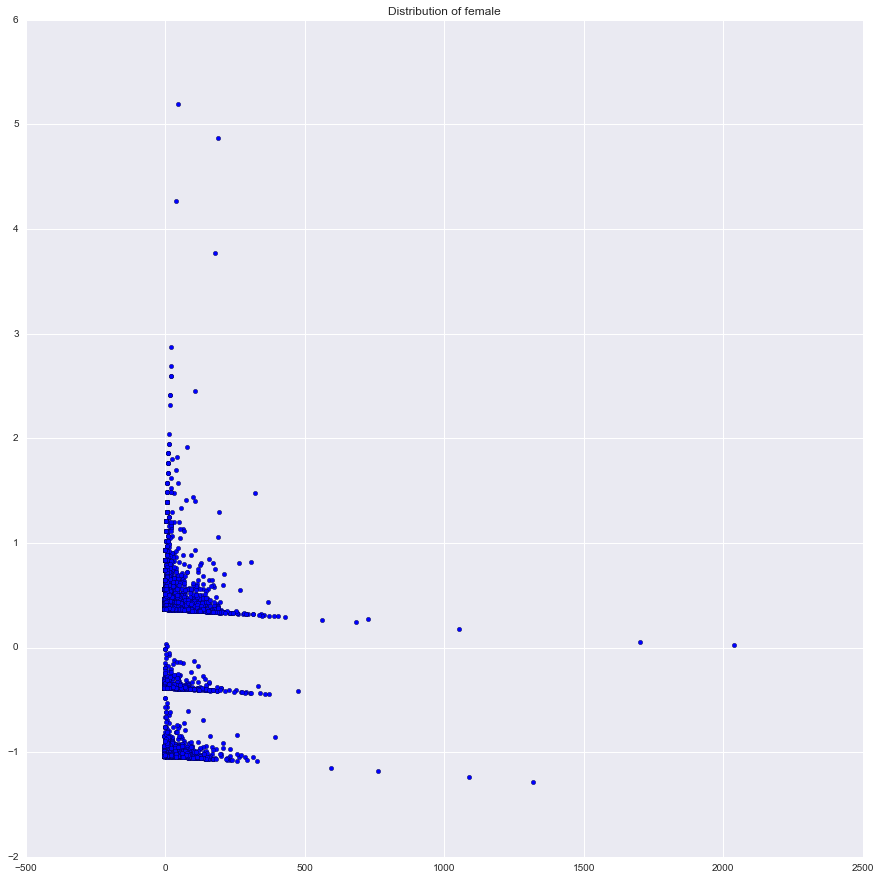

In [123]:
# visualize df_user in 2D surface
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_user_2D = pca.fit_transform(df_user.as_matrix())
fig = plt.figure(figsize=(15, 15))
plt.scatter(x=df_user_2D[:, 0], y=df_user_2D[:, 1])
plt.title("Distribution of "+col)
plt.show()

I guess these three clusters come from the one-hot-encoding of 'gender'

In [124]:
# 
kmeans = KMeans(n_clusters=df_user.shape[1], init='k-means++', n_init=20, max_iter=500, tol=0.0001, 
                precompute_distances='auto', verbose=0, random_state=2017, copy_x=True, n_jobs=1)
print('start kmeans fitting:')
kmeans = kmeans.fit(df_user.as_matrix())
print('finish kmeans fitting!')
print(np.linalg.det(kmeans.cluster_centers_))
user_rep = np.linalg.solve((kmeans.cluster_centers_).T, (df_user.as_matrix()).T).T

df_user_rep = pd.DataFrame(data=user_rep, columns=None)
df_user_rep['user_ID'] = user_id
df_user_rep.to_csv('share/user_rep.csv', index=False)
print(df_user_rep.describe())

start kmeans fitting:
finish kmeans fitting!
2.01636780681e-16
                   0              1              2              3  \
count  228114.000000  228114.000000  228114.000000  228114.000000   
mean        0.186179       0.001872       0.000013       0.011919   
std        92.436432       5.728432       0.179311      32.603526   
min     -1946.116452    -403.831584      -5.033385    -229.862156   
25%       -23.314625      -0.922548      -0.045581      -5.171971   
50%       -16.767115      -0.367999      -0.034798      -2.859449   
75%        28.747186       1.591946       0.066642      -0.885242   
max      3784.111123     907.879519      13.458634    1414.234080   

                   4              5              6              7  \
count  228114.000000  228114.000000  228114.000000  228114.000000   
mean        0.663611       0.000829       0.004945       0.000219   
std        61.312862       5.048430      31.402999       5.015508   
min     -2629.780572    -249.797896   -